# L3 - ipv6

This notebook provides a comprehensive guide and a set of scripts to configure and manage a specific network topology for testing IPv6 forwarding. It covers everything from importing libraries and defining variables to executing the necessary commands to establish the topology and conduct both regular and background traffic tests. Throughout this process, the notebook ensures that the network topology is correctly configured and ready for extensive L3 forwarding testing, providing a robust and efficient testing environment.

The topology to be used is as follows.

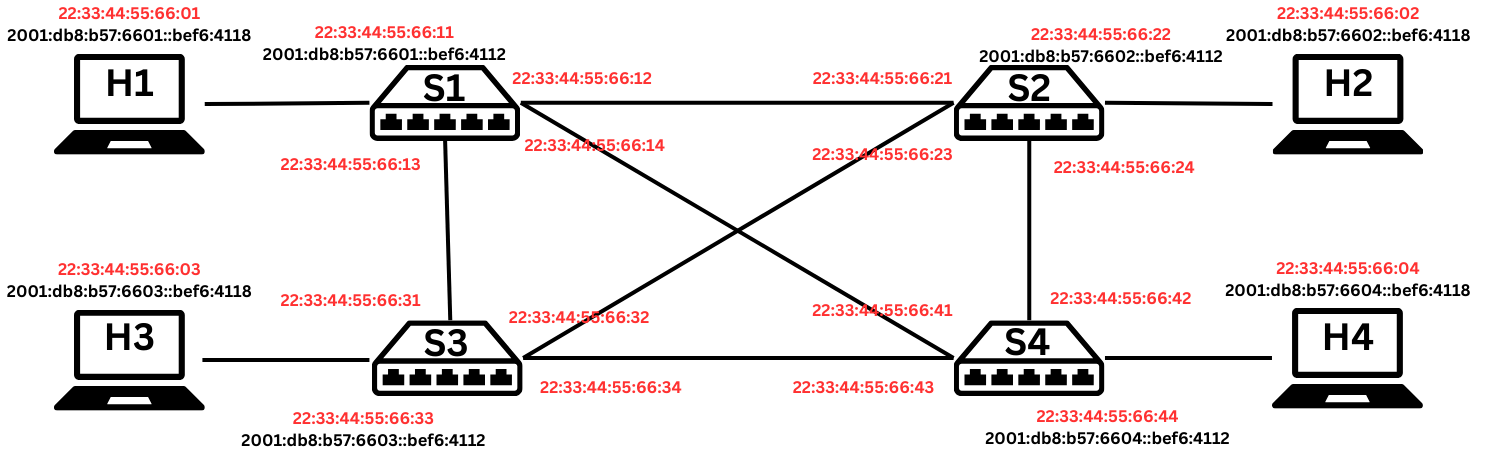

## Create Topology

In this section, we will create the topology shown above to test IPv6 forwarding. This section should be executed only once, when the slice and the topology have not been previously created.

### Imports

The following code imports essential modules and functions for working with IP addresses, managing a testbed environment, introducing execution delays, and handling JSON data. Specifically, it imports ip_address, IPv4Address, and IPv4Network from the ipaddress module for IP address manipulation, the FablibManager class from the fabrictestbed_extensions.fablib library for testbed management, the sleep function from the time module for pausing program execution, and the json module for working with JSON data.

In [ ]:
from ipaddress import IPv6Address, IPv6Network
import ipaddress
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager
from time import sleep
import json

### Variables

In this section, we will configure the necessary variables for creating the slice as well as for setting up the network topology.

#### Slice Variables

The code sets up the configuration for a network slice named "INT", specifying resource allocations for both hosts and switches, as well as designating the sites and the operating system image to be used. Each host is allocated 2 CPU cores, 2 GB of RAM, and 10 GB of disk space, while each switch is allocated 4 CPU cores, 8 GB of RAM, and 10 GB of disk space. The four sites are the University of Maryland (MAX), the University of Michigan (MICH), the CERN, and in Altanta (ATLA). Finally the system image configured for use is "default_ubuntu_2

In [ ]:
# Slice configuration
slice_name = "L3net_ipv6"  # Slice name

# Hosts configuration
host_cores = 2
host_ram = 2
host_disk = 10

# Switch configuration
switch_cores = 4
switch_ram = 8
switch_disk = 10

site1 = "MAX"  # Site name
site2 = "MICH"  # Site name
site3 = "CERN"  # Site name
site4 = "ATLA"  # Site name

# Image configuration
image = "default_ubuntu_20"

#### Network Variables

The Python code reads network configuration data from a JSON file located at './utils/network_data.json' and extracts MAC and IP addresses for hosts and switches within different subnets. The decision was made to store the network element configuration information in an external file to provide a personalized learning experience for each student. Since it is a JSON file, the values can be easily understood at a glance.

In [ ]:
file_path = './utils/network_data.json'

with open(file_path, 'r') as file:
    data = json.load(file)

    # MAC
    h1_mac = data['hosts']['h1']['mac']
    h2_mac = data['hosts']['h2']['mac']
    h3_mac = data['hosts']['h3']['mac']
    h4_mac = data['hosts']['h4']['mac']

    s1_mac_1 = data['switches']['s1']['macs'][0]
    s1_mac_2 = data['switches']['s1']['macs'][1]
    s1_mac_3 = data['switches']['s1']['macs'][2]
    s1_mac_4 = data['switches']['s1']['macs'][3]

    s2_mac_1 = data['switches']['s2']['macs'][0]
    s2_mac_2 = data['switches']['s2']['macs'][1]
    s2_mac_3 = data['switches']['s2']['macs'][2]
    s2_mac_4 = data['switches']['s2']['macs'][3]

    s3_mac_1 = data['switches']['s3']['macs'][0]
    s3_mac_2 = data['switches']['s3']['macs'][1]
    s3_mac_3 = data['switches']['s3']['macs'][2]
    s3_mac_4 = data['switches']['s3']['macs'][3]

    s4_mac_1 = data['switches']['s4']['macs'][0]
    s4_mac_2 = data['switches']['s4']['macs'][1]
    s4_mac_3 = data['switches']['s4']['macs'][2]
    s4_mac_4 = data['switches']['s4']['macs'][3]

    # IP
    subnet1 = data['subnets']['subnet1']
    h1_ip = data['hosts']['h1']['ip']
    s1_ip = data['switches']['s1']['ip']

    subnet2 = data['subnets']['subnet2']
    h2_ip = data['hosts']['h2']['ip']
    s2_ip = data['switches']['s2']['ip']
    
    subnet3 = data['subnets']['subnet3']
    h3_ip = data['hosts']['h3']['ip']
    s3_ip = data['switches']['s3']['ip']
    
    subnet4 = data['subnets']['subnet4']
    h4_ip = data['hosts']['h4']['ip']
    s4_ip = data['switches']['s4']['ip']

network = ipaddress.IPv6Network(subnet2)
net = network.supernet(new_prefix=32)

### Build Topology

In this section we will configure the network nodes, as well as the links that connect them.

#### Slice creation

This Python code initializes a network management object and creates a new network slice. First, it creates an instance of the FablibManager class by calling fablib_manager(), which is stored in the variable fablib. Then, it creates a new network slice with the name specified by slice_name, in this case "L3net" using the new_slice method of the fablib object, and assigns this new slice to the variable slice. This setup allows for the management and configuration of the specified network slice.

In [ ]:
fablib = fablib_manager() # Create a new FablibManager object
slice = fablib.new_slice(name=slice_name) # Create a new slice

#### Create Topology

This Python code sets up a network slice by creating and configuring hosts and switches, adding network interfaces, and establishing connections between them. It defines four hosts (h1 to h4) and four switches (s1 to s4), each with specified resources (cores, RAM, disk) and an image (default_ubuntu_20). Each node is assigned interfaces, with hosts having one each and switches having four. The code then creates Layer 2 networks to connect the interfaces of the hosts and switches, forming the network topology. Finally, it submits the slice configuration and handles any errors that may occur during the process.

In [ ]:
try:
    # Hosts and switches creation
    h1 = slice.add_node(name="h1", site=site1, cores=host_cores, ram=host_ram, disk=host_disk, image=image)
    h2 = slice.add_node(name="h2", site=site2, cores=host_cores, ram=host_ram, disk=host_disk, image=image)
    h3 = slice.add_node(name="h3", site=site3, cores=host_cores, ram=host_ram, disk=host_disk, image=image)
    h4 = slice.add_node(name="h4", site=site4, cores=host_cores, ram=host_ram, disk=host_disk, image=image)
    s1 = slice.add_node(name="s1", site=site1, cores=switch_cores, ram=switch_ram, disk=switch_disk, image=image)
    s2 = slice.add_node(name="s2", site=site2, cores=switch_cores, ram=switch_ram, disk=switch_disk, image=image)
    s3 = slice.add_node(name="s3", site=site3, cores=switch_cores, ram=switch_ram, disk=switch_disk, image=image)
    s4 = slice.add_node(name="s4", site=site4, cores=switch_cores, ram=switch_ram, disk=switch_disk, image=image)
    
    # Interfaces creation
    h1_iface0 = h1.add_component(model='NIC_Basic', name='h1p0').get_interfaces()[0]
    h2_iface0 = h2.add_component(model='NIC_Basic', name='h2p0').get_interfaces()[0]
    h3_iface0 = h3.add_component(model='NIC_Basic', name='h3p0').get_interfaces()[0]
    h4_iface0 = h4.add_component(model='NIC_Basic', name='h4p0').get_interfaces()[0]
    
    s1_iface1 = s1.add_component(model='NIC_Basic', name='s1p1').get_interfaces()[0]
    s1_iface2 = s1.add_component(model='NIC_Basic', name='s1p2').get_interfaces()[0]
    s1_iface3 = s1.add_component(model='NIC_Basic', name='s1p3').get_interfaces()[0]
    s1_iface4 = s1.add_component(model='NIC_Basic', name='s1p4').get_interfaces()[0]

    s2_iface1 = s2.add_component(model='NIC_Basic', name='s2p1').get_interfaces()[0]
    s2_iface2 = s2.add_component(model='NIC_Basic', name='s2p2').get_interfaces()[0]
    s2_iface3 = s2.add_component(model='NIC_Basic', name='s2p3').get_interfaces()[0]
    s2_iface4 = s2.add_component(model='NIC_Basic', name='s2p4').get_interfaces()[0]

    s3_iface1 = s3.add_component(model='NIC_Basic', name='s3p1').get_interfaces()[0]
    s3_iface2 = s3.add_component(model='NIC_Basic', name='s3p2').get_interfaces()[0]
    s3_iface3 = s3.add_component(model='NIC_Basic', name='s3p3').get_interfaces()[0]
    s3_iface4 = s3.add_component(model='NIC_Basic', name='s3p4').get_interfaces()[0]

    s4_iface1 = s4.add_component(model='NIC_Basic', name='s4p1').get_interfaces()[0]
    s4_iface2 = s4.add_component(model='NIC_Basic', name='s4p2').get_interfaces()[0]
    s4_iface3 = s4.add_component(model='NIC_Basic', name='s4p3').get_interfaces()[0]
    s4_iface4 = s4.add_component(model='NIC_Basic', name='s4p4').get_interfaces()[0]
    
    # Connections
    s1h1 = slice.add_l2network(name='s1h1', interfaces=[s1_iface1, h1_iface0])
    s1s2 = slice.add_l2network(name='s1s2', interfaces=[s1_iface2, s2_iface1])
    s1s3 = slice.add_l2network(name='s1s3', interfaces=[s1_iface3, s3_iface1])
    s1s4 = slice.add_l2network(name='s1s4', interfaces=[s1_iface4, s4_iface1])

    s2h2 = slice.add_l2network(name='s2h2', interfaces=[s2_iface2, h2_iface0])
    s2s3 = slice.add_l2network(name='s2s3', interfaces=[s2_iface3, s3_iface2])
    s2s4 = slice.add_l2network(name='s2s4', interfaces=[s2_iface4, s4_iface2])
    
    s3h3 = slice.add_l2network(name='s3h3', interfaces=[s3_iface3, h3_iface0])
    s3s4 = slice.add_l2network(name='s3s4', interfaces=[s3_iface4, s4_iface3])

    s4h4 = slice.add_l2network(name='s4h4', interfaces=[s4_iface4, h4_iface0])

    # Add the nodes to the slice
    slice.submit()
except Exception as e:
    print(f"Error: {e}")

### Install packages

In this section, we will install the necessary packages to ensure all functionalities of the topology work properly. Prior to this, each network node will need to be obtained.

#### Obtain nodes

This Python code retrieves previously created nodes from the network slice. It fetches four switch nodes (s1, s2, s3, s4) and four host nodes (h1, h2, h3, h4) by their names from the slice configuration. These retrieved nodes can then be used for further operations or configurations within the network slice.

In [ ]:
s1 = slice.get_node(name="s1")
s2 = slice.get_node(name="s2")
s3 = slice.get_node(name="s3")
s4 = slice.get_node(name="s4")

h1 = slice.get_node(name="h1")
h2 = slice.get_node(name="h2")
h3 = slice.get_node(name="h3")
h4 = slice.get_node(name="h4")

#### Install packages

This Python code installs essential software on network switches and hosts within the slice. It defines commands for installing the P4 behavioral model (bmv2), network tools (net-tools), the Scapy library, and the traffic generation tool hping3. The switches (s1, s2, s3, s4) execute commands to install bmv2 and net-tools, while the hosts (h1, h2, h3, h4) install net-tools, Scapy, and hping3. Each installation command is executed on the respective nodes, capturing the output and any errors quietly.

In [ ]:
install_bmv2 = '. /etc/os-release && echo "deb https://download.opensuse.org/repositories/home:/p4lang/xUbuntu_${VERSION_ID}/ /" | sudo tee /etc/apt/sources.list.d/home:p4lang.list && curl -L "https://download.opensuse.org/repositories/home:/p4lang/xUbuntu_${VERSION_ID}/Release.key" | sudo apt-key add - && sudo apt-get update && sudo apt install -y p4lang-p4c'
install_net_tools = 'sudo apt-get install -y net-tools'
install_scapy = 'sudo apt-get update && sudo apt-get install -y python3-scapy'
install_traffic = 'sudo apt-get install -y hping3'

# The switches will install bmv2 and net-tools
stdout, stderr = s1.execute(f'{install_bmv2} && {install_net_tools}', quiet=True)
stdout, stderr = s2.execute(f'{install_bmv2} && {install_net_tools}', quiet=True)
stdout, stderr = s3.execute(f'{install_bmv2} && {install_net_tools}', quiet=True)
stdout, stderr = s4.execute(f'{install_bmv2} && {install_net_tools}', quiet=True)

# The hosts will install net-tools, scapy and for the Traffic.py program. 
stdout, stderr = h1.execute(f'{install_net_tools} && {install_scapy} && {install_traffic}', quiet=True)
stdout, stderr = h2.execute(f'{install_net_tools} && {install_scapy} && {install_traffic}', quiet=True)
stdout, stderr = h3.execute(f'{install_net_tools} && {install_scapy} && {install_traffic}', quiet=True)
stdout, stderr = h4.execute(f'{install_net_tools} && {install_scapy} && {install_traffic}', quiet=True)


### Assigning IP and MAC addresses

In this section, we will bring up the interfaces so they can be used in the topology and configure the MAC and IPv4 addresses of the nodes. To achieve this, we will first obtain the interfaces of each node.

#### Obtain interfaces

This Python code retrieves and prints the device names of network interfaces for each switch and host within the network slice. For each switch (s1, s2, s3, s4), it gets the interfaces associated with their respective network connections (s1h1, s1s2, s1s3, etc.) and prints the device names. Similarly, for each host (h1, h2, h3, h4), it retrieves the interfaces associated with their respective network connections to switches (s1h1, s2h2, s3h3, s4h4) and prints their device names. This setup helps in identifying and verifying the network interfaces used in the slice configuration.

In [ ]:
## Switches
# S1
s1_iface1 = s1.get_interface(network_name='s1h1')
s1_iface1_name = s1_iface1.get_device_name()
print(f's1_iface1: {s1_iface1_name}')

s1_iface2 = s1.get_interface(network_name='s1s2')
s1_iface2_name = s1_iface2.get_device_name()
print(f's1_iface2: {s1_iface2_name}')

s1_iface3 = s1.get_interface(network_name='s1s3')
s1_iface3_name = s1_iface3.get_device_name()
print(f's1_iface3: {s1_iface3_name}')

s1_iface4 = s1.get_interface(network_name='s1s4')
s1_iface4_name = s1_iface4.get_device_name()
print(f's1_iface4: {s1_iface4_name}')

# S2
s2_iface1 = s2.get_interface(network_name='s1s2')
s2_iface1_name = s2_iface1.get_device_name()
print(f's2_iface1: {s2_iface1_name}')

s2_iface2 = s2.get_interface(network_name='s2h2')
s2_iface2_name = s2_iface2.get_device_name()
print(f's2_iface2: {s2_iface2_name}')

s2_iface3 = s2.get_interface(network_name='s2s3')
s2_iface3_name = s2_iface3.get_device_name()
print(f's2_iface3: {s2_iface3_name}')

s2_iface4 = s2.get_interface(network_name='s2s4')
s2_iface4_name = s2_iface4.get_device_name()
print(f's2_iface4: {s2_iface4_name}')

# S3
s3_iface1 = s3.get_interface(network_name='s1s3')
s3_iface1_name = s3_iface1.get_device_name()
print(f's3_iface1: {s3_iface1_name}')

s3_iface2 = s3.get_interface(network_name='s2s3')
s3_iface2_name = s3_iface2.get_device_name()
print(f's3_iface2: {s3_iface2_name}')

s3_iface3 = s3.get_interface(network_name='s3h3')
s3_iface3_name = s3_iface3.get_device_name()
print(f's3_iface3: {s3_iface3_name}')

s3_iface4 = s3.get_interface(network_name='s3s4')
s3_iface4_name = s3_iface4.get_device_name()
print(f's3_iface4: {s3_iface4_name}')

# S4
s4_iface1 = s4.get_interface(network_name='s1s4')
s4_iface1_name = s4_iface1.get_device_name()
print(f's4_iface2: {s4_iface1_name}')

s4_iface2 = s4.get_interface(network_name='s2s4')
s4_iface2_name = s4_iface2.get_device_name()
print(f's4_iface2: {s4_iface2_name}')

s4_iface3 = s4.get_interface(network_name='s3s4')
s4_iface3_name = s4_iface3.get_device_name()
print(f's4_iface3: {s4_iface3_name}')

s4_iface4 = s4.get_interface(network_name='s4h4')
s4_iface4_name = s4_iface4.get_device_name()
print(f's4_iface4: {s4_iface4_name}')

## Hosts
h1_iface0 = h1.get_interface(network_name='s1h1')
h1_iface0_name = h1_iface0.get_device_name()
print(f'h1_iface0: {h1_iface0_name}')

h2_iface0 = h2.get_interface(network_name='s2h2')
h2_iface0_name = h2_iface0.get_device_name()
print(f'h2_iface0: {h2_iface0_name}')

h3_iface0 = h3.get_interface(network_name='s3h3')
h3_iface0_name = h3_iface0.get_device_name()
print(f'h3_iface0: {h3_iface0_name}')

h4_iface0 = h4.get_interface(network_name='s4h4')
h4_iface0_name = h4_iface0.get_device_name()
print(f'h4_iface0: {h4_iface0_name}')


#### Turning interfaces up

This Python code brings up the network interfaces for all switches and hosts within the network slice. For each switch (`s1`, `s2`, `s3`, `s4`), it executes commands to enable (bring up) each of their respective interfaces (`s1_iface1_name` to `s1_iface4_name`, etc.) using the `sudo ip link set dev <interface> up` command. Similarly, it brings up the interfaces for each host (`h1`, `h2`, `h3`, `h4`) by executing the same command for their respective interfaces. The `quiet=True` parameter ensures that the command output is not printed, capturing any output or errors in `stdout` and `stderr`. This setup ensures all network interfaces are active and ready for communication.

In [ ]:
## Switches
#S1
stdout, stderr = s1.execute(f'sudo ip link set dev {s1_iface1_name} up', quiet=True)
stdout, stderr = s1.execute(f'sudo ip link set dev {s1_iface2_name} up', quiet=True)
stdout, stderr = s1.execute(f'sudo ip link set dev {s1_iface3_name} up', quiet=True)
stdout, stderr = s1.execute(f'sudo ip link set dev {s1_iface4_name} up', quiet=True)

#S2
stdout, stderr = s2.execute(f'sudo ip link set dev {s2_iface1_name} up', quiet=True)
stdout, stderr = s2.execute(f'sudo ip link set dev {s2_iface2_name} up', quiet=True)
stdout, stderr = s2.execute(f'sudo ip link set dev {s2_iface3_name} up', quiet=True)
stdout, stderr = s2.execute(f'sudo ip link set dev {s2_iface4_name} up', quiet=True)

#S3
stdout, stderr = s3.execute(f'sudo ip link set dev {s3_iface1_name} up', quiet=True)
stdout, stderr = s3.execute(f'sudo ip link set dev {s3_iface2_name} up', quiet=True)
stdout, stderr = s3.execute(f'sudo ip link set dev {s3_iface3_name} up', quiet=True)
stdout, stderr = s3.execute(f'sudo ip link set dev {s3_iface4_name} up', quiet=True)

#S4
stdout, stderr = s4.execute(f'sudo ip link set dev {s4_iface1_name} up', quiet=True)
stdout, stderr = s4.execute(f'sudo ip link set dev {s4_iface2_name} up', quiet=True)
stdout, stderr = s4.execute(f'sudo ip link set dev {s4_iface3_name} up', quiet=True)
stdout, stderr = s4.execute(f'sudo ip link set dev {s4_iface4_name} up', quiet=True)

# Hosts
stdout, stderr = h1.execute(f'sudo ip link set dev {h1_iface0_name} up', quiet=True)
stdout, stderr = h2.execute(f'sudo ip link set dev {h2_iface0_name} up', quiet=True)
stdout, stderr = h3.execute(f'sudo ip link set dev {h3_iface0_name} up', quiet=True)
stdout, stderr = h4.execute(f'sudo ip link set dev {h4_iface0_name} up', quiet=True)

#### Configure MAC and IP

This Python code configures the MAC and IP addresses for the interfaces of switches and hosts in a network slice. It sets the MAC addresses for each interface of the switches (`s1`, `s2`, `s3`, `s4`) and hosts (`h1`, `h2`, `h3`, `h4`) using the `sudo ifconfig <interface> hw ether <mac_address>` command, followed by setting the IP addresses for these interfaces using the `sudo ifconfig <interface> <ip_address>` command.

In [ ]:
# MAC
print("MAC")
stdout, stderr = s1.execute(f'sudo ifconfig {s1_iface1_name} hw ether {s1_mac_1}')
stdout, stderr = s1.execute(f'sudo ifconfig {s1_iface2_name} hw ether {s1_mac_2}')
stdout, stderr = s1.execute(f'sudo ifconfig {s1_iface3_name} hw ether {s1_mac_3}')
stdout, stderr = s1.execute(f'sudo ifconfig {s1_iface4_name} hw ether {s1_mac_4}')
print("S1")
stdout, stderr = s2.execute(f'sudo ifconfig {s2_iface1_name} hw ether {s2_mac_1}')
stdout, stderr = s2.execute(f'sudo ifconfig {s2_iface2_name} hw ether {s2_mac_2}')
stdout, stderr = s2.execute(f'sudo ifconfig {s2_iface3_name} hw ether {s2_mac_3}')
stdout, stderr = s2.execute(f'sudo ifconfig {s2_iface4_name} hw ether {s2_mac_4}')
print("S2")
stdout, stderr = s3.execute(f'sudo ifconfig {s3_iface1_name} hw ether {s3_mac_1}')
stdout, stderr = s3.execute(f'sudo ifconfig {s3_iface2_name} hw ether {s3_mac_2}')
stdout, stderr = s3.execute(f'sudo ifconfig {s3_iface3_name} hw ether {s3_mac_3}')
stdout, stderr = s3.execute(f'sudo ifconfig {s3_iface4_name} hw ether {s3_mac_4}')
print("S3")
stdout, stderr = s4.execute(f'sudo ifconfig {s4_iface1_name} hw ether {s4_mac_1}')
stdout, stderr = s4.execute(f'sudo ifconfig {s4_iface2_name} hw ether {s4_mac_2}')
stdout, stderr = s4.execute(f'sudo ifconfig {s4_iface3_name} hw ether {s4_mac_3}')
stdout, stderr = s4.execute(f'sudo ifconfig {s4_iface4_name} hw ether {s4_mac_4}')
print("S4")
stdout, stderr = h1.execute(f'sudo ifconfig {h1_iface0_name} hw ether {h1_mac}')
stdout, stderr = h2.execute(f'sudo ifconfig {h2_iface0_name} hw ether {h2_mac}')
stdout, stderr = h3.execute(f'sudo ifconfig {h3_iface0_name} hw ether {h3_mac}')
stdout, stderr = h4.execute(f'sudo ifconfig {h4_iface0_name} hw ether {h4_mac}')
print("Hosts")

# IP
print("IP")
stdout, stderr = s1.execute(f'sudo ifconfig {s1_iface1_name} add {s1_ip} up')
stdout, stderr = s2.execute(f'sudo ifconfig {s2_iface2_name} add {s2_ip} up')
stdout, stderr = s3.execute(f'sudo ifconfig {s3_iface3_name} add {s3_ip} up')
stdout, stderr = s4.execute(f'sudo ifconfig {s4_iface4_name} add {s4_ip} up')
print("Switches")
stdout, stderr = h1.execute(f'sudo ifconfig {h1_iface0_name} add {h1_ip} up')
stdout, stderr = h2.execute(f'sudo ifconfig {h2_iface0_name} add {h2_ip} up')
stdout, stderr = h3.execute(f'sudo ifconfig {h3_iface0_name} add {h3_ip} up')
stdout, stderr = h4.execute(f'sudo ifconfig {h4_iface0_name} add {h4_ip} up')
print("Hosts")

### Configure Forwarding and routing

In this section we will enable ipv4 forwarding on each of the switches, as well as configure the route and arp tables on the hosts.

#### Enable IPv6 forwarding

The following Python code enables IP forwarding on each of the switches in the network slice to allow them to forward packets between different network interfaces. This configuration is essential for routing packets across the network slice, enabling communication between different subnets.

In [ ]:
stdout, stderr = s1.execute("sudo sysctl net.ipv6.conf.all.forwarding=1", quiet=True)
stdout, stderr = s2.execute("sudo sysctl net.ipv6.conf.all.forwarding=1", quiet=True)
stdout, stderr = s3.execute("sudo sysctl net.ipv6.conf.all.forwarding=1", quiet=True)
stdout, stderr = s4.execute("sudo sysctl net.ipv6.conf.all.forwarding=1", quiet=True)

#### Deleting routing tables

This Python code removes existing IP routes to specified subnets from each switch in the network slice. This cleanup step is essential for resetting or reconfiguring the routing tables on the switches to ensure they only have the necessary routes for the current network configuration.

In [ ]:
stdout, stderr = s1.execute(f'sudo ip -6 route del {subnet1}', quiet=True)
stdout, stderr = s1.execute(f'sudo ip -6 route del {subnet2}', quiet=True)
stdout, stderr = s1.execute(f'sudo ip -6 route del {subnet3}', quiet=True)
stdout, stderr = s1.execute(f'sudo ip -6 route del {subnet4}', quiet=True)

stdout, stderr = s2.execute(f'sudo ip -6 route del {subnet1}', quiet=True)
stdout, stderr = s2.execute(f'sudo ip -6 route del {subnet2}', quiet=True)
stdout, stderr = s2.execute(f'sudo ip -6 route del {subnet3}', quiet=True)
stdout, stderr = s2.execute(f'sudo ip -6 route del {subnet4}', quiet=True)

stdout, stderr = s3.execute(f'sudo ip -6 route del {subnet1}', quiet=True)
stdout, stderr = s3.execute(f'sudo ip -6 route del {subnet2}', quiet=True)
stdout, stderr = s3.execute(f'sudo ip -6 route del {subnet3}', quiet=True)
stdout, stderr = s3.execute(f'sudo ip -6 route del {subnet4}', quiet=True)

stdout, stderr = s4.execute(f'sudo ip -6 route del {subnet1}', quiet=True)
stdout, stderr = s4.execute(f'sudo ip -6 route del {subnet2}', quiet=True)
stdout, stderr = s4.execute(f'sudo ip -6 route del {subnet3}', quiet=True)
stdout, stderr = s4.execute(f'sudo ip -6 route del {subnet4}', quiet=True)


stdout, stderr = h1.execute(f'sudo ip -6 route del {net} dev {h1_iface0_name}', quiet=True)
stdout, stderr = h2.execute(f'sudo ip -6 route del {net} dev {h2_iface0_name}', quiet=True)
stdout, stderr = h3.execute(f'sudo ip -6 route del {net} dev {h3_iface0_name}', quiet=True)
stdout, stderr = h4.execute(f'sudo ip -6 route del {net} dev {h4_iface0_name}', quiet=True)

#### Configure routing in hosts

This Python code configures routing on each host in the network slice to enable communication with other subnets via their respective switches. It adds routes on host h1 to subnet2, subnet3, and subnet4 via switch s1; on host h2 to subnet1, subnet3, and subnet4 via switch s2; on host h3 to subnet1, subnet2, and subnet4 via switch s3; and on host h4 to subnet1, subnet2, and subnet3 via switch s4. This ensures that each host can reach other subnets through the appropriate switch gateways, facilitating inter-subnet communication.

In [ ]:
stdout, stderr = h1.execute(f'sudo ip -6 route add {subnet2} dev {h1_iface0_name}')
stdout, stderr = h1.execute(f'sudo ip -6 route add {subnet3} dev {h1_iface0_name}')
stdout, stderr = h1.execute(f'sudo ip -6 route add {subnet4} dev {h1_iface0_name}')

stdout, stderr = h2.execute(f'sudo ip -6 route add {subnet1} dev {h2_iface0_name}')
stdout, stderr = h2.execute(f'sudo ip -6 route add {subnet3} dev {h2_iface0_name}')
stdout, stderr = h2.execute(f'sudo ip -6 route add {subnet4} dev {h2_iface0_name}')

stdout, stderr = h3.execute(f'sudo ip -6 route add {subnet1} dev {h3_iface0_name}')
stdout, stderr = h3.execute(f'sudo ip -6 route add {subnet2} dev {h3_iface0_name}')
stdout, stderr = h3.execute(f'sudo ip -6 route add {subnet4} dev {h3_iface0_name}')

stdout, stderr = h4.execute(f'sudo ip -6 route add {subnet1} dev {h4_iface0_name}')
stdout, stderr = h4.execute(f'sudo ip -6 route add {subnet2} dev {h4_iface0_name}')
stdout, stderr = h4.execute(f'sudo ip -6 route add {subnet3} dev {h4_iface0_name}')

#### IPv6 neighbors table configuration

The following commands are setting up static neighbor entries to ensure each host knows how to reach each other host via direct MAC addresses

In [ ]:
stdout, stderr = h1.execute(f'sudo ip -6 neigh add {h2_ip} lladdr {s1_mac_1} dev {h1_iface0_name}')
stdout, stderr = h1.execute(f'sudo ip -6 neigh add {h3_ip} lladdr {s1_mac_1} dev {h1_iface0_name}')
stdout, stderr = h1.execute(f'sudo ip -6 neigh add {h4_ip} lladdr {s1_mac_1} dev {h1_iface0_name}')

stdout, stderr = h2.execute(f'sudo ip -6 neigh add {h1_ip} lladdr {s2_mac_2} dev {h2_iface0_name}')
stdout, stderr = h2.execute(f'sudo ip -6 neigh add {h3_ip} lladdr {s2_mac_2} dev {h2_iface0_name}')
stdout, stderr = h2.execute(f'sudo ip -6 neigh add {h4_ip} lladdr {s2_mac_2} dev {h2_iface0_name}')

stdout, stderr = h3.execute(f'sudo ip -6 neigh add {h1_ip} lladdr {s3_mac_3} dev {h3_iface0_name}')
stdout, stderr = h3.execute(f'sudo ip -6 neigh add {h2_ip} lladdr {s3_mac_3} dev {h3_iface0_name}')
stdout, stderr = h3.execute(f'sudo ip -6 neigh add {h4_ip} lladdr {s3_mac_3} dev {h3_iface0_name}')

stdout, stderr = h4.execute(f'sudo ip -6 neigh add {h1_ip} lladdr {s4_mac_4} dev {h4_iface0_name}')
stdout, stderr = h4.execute(f'sudo ip -6 neigh add {h2_ip} lladdr {s4_mac_4} dev {h4_iface0_name}')
stdout, stderr = h4.execute(f'sudo ip -6 neigh add {h3_ip} lladdr {s4_mac_4} dev {h4_iface0_name}')

## Reset Topology

In this section, we will create the following topology to test IPv4 forwarding. This section should be executed when the topology has already been built and the Python kernel has been restarted to redefine the topology variables.

### Imports

The following code imports essential modules and functions for working with IP addresses, managing a testbed environment, introducing execution delays, and handling JSON data. Specifically, it imports ip_address, IPv4Address, and IPv4Network from the ipaddress module for IP address manipulation, the FablibManager class from the fabrictestbed_extensions.fablib library for testbed management, the sleep function from the time module for pausing program execution, and the json module for working with JSON data.

In [ ]:
from ipaddress import IPv6Address, IPv6Network
import ipaddress
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager
from time import sleep
import json

### Reset variables, nodes and interfaces

This Python code sets up and retrieves the network configuration for a slice named "L3net". It starts by initializing a `FablibManager` object and retrieving the slice configuration. It reads MAC and IP address data for hosts and switches from a JSON file. For each switch (`s1`, `s2`, `s3`, `s4`) and host (`h1`, `h2`, `h3`, `h4`), it extracts the relevant network interface names. The MAC addresses are mapped to interfaces, and the IP addresses are organized by subnets. This setup allows the program to configure the network interfaces and routes accurately, ensuring proper communication within the network slice.

In [ ]:
verbose = 0
slice_name = "L3net_ipv6"  # Slice name

fablib = fablib_manager()
slice = fablib.get_slice(name=slice_name)

file_path = './utils/network_data.json'

with open(file_path, 'r') as file:
    data = json.load(file)

    # MAC
    h1_mac = data['hosts']['h1']['mac']
    h2_mac = data['hosts']['h2']['mac']
    h3_mac = data['hosts']['h3']['mac']
    h4_mac = data['hosts']['h4']['mac']

    s1_mac_1 = data['switches']['s1']['macs'][0]
    s1_mac_2 = data['switches']['s1']['macs'][1]
    s1_mac_3 = data['switches']['s1']['macs'][2]
    s1_mac_4 = data['switches']['s1']['macs'][3]

    s2_mac_1 = data['switches']['s2']['macs'][0]
    s2_mac_2 = data['switches']['s2']['macs'][1]
    s2_mac_3 = data['switches']['s2']['macs'][2]
    s2_mac_4 = data['switches']['s2']['macs'][3]

    s3_mac_1 = data['switches']['s3']['macs'][0]
    s3_mac_2 = data['switches']['s3']['macs'][1]
    s3_mac_3 = data['switches']['s3']['macs'][2]
    s3_mac_4 = data['switches']['s3']['macs'][3]

    s4_mac_1 = data['switches']['s4']['macs'][0]
    s4_mac_2 = data['switches']['s4']['macs'][1]
    s4_mac_3 = data['switches']['s4']['macs'][2]
    s4_mac_4 = data['switches']['s4']['macs'][3]

    # IP
    subnet1 = data['subnets']['subnet1']
    h1_ip = data['hosts']['h1']['ip']
    s1_ip = data['switches']['s1']['ip']

    subnet2 = data['subnets']['subnet2']
    h2_ip = data['hosts']['h2']['ip']
    s2_ip = data['switches']['s2']['ip']
    
    subnet3 = data['subnets']['subnet3']
    h3_ip = data['hosts']['h3']['ip']
    s3_ip = data['switches']['s3']['ip']
    
    subnet4 = data['subnets']['subnet4']
    h4_ip = data['hosts']['h4']['ip']
    s4_ip = data['switches']['s4']['ip']

network = ipaddress.IPv6Network(subnet1)
net = network.supernet(new_prefix=32)

s1 = slice.get_node(name='s1')
s2 = slice.get_node(name='s2')
s3 = slice.get_node(name='s3')
s4 = slice.get_node(name='s4')

h1 = slice.get_node(name='h1')
h2 = slice.get_node(name='h2')
h3 = slice.get_node(name='h3')
h4 = slice.get_node(name='h4')

s1_iface1_name = s1.get_interface(network_name='s1h1').get_device_name()
s1_iface2_name = s1.get_interface(network_name='s1s2').get_device_name()
s1_iface3_name = s1.get_interface(network_name='s1s3').get_device_name()
s1_iface4_name = s1.get_interface(network_name='s1s4').get_device_name()
s2_iface1_name = s2.get_interface(network_name='s1s2').get_device_name()
s2_iface2_name = s2.get_interface(network_name='s2h2').get_device_name()
s2_iface3_name = s2.get_interface(network_name='s2s3').get_device_name()
s2_iface4_name = s2.get_interface(network_name='s2s4').get_device_name()
s3_iface1_name = s3.get_interface(network_name='s1s3').get_device_name()
s3_iface2_name = s3.get_interface(network_name='s2s3').get_device_name()
s3_iface3_name = s3.get_interface(network_name='s3h3').get_device_name()
s3_iface4_name = s3.get_interface(network_name='s3s4').get_device_name()
s4_iface1_name = s4.get_interface(network_name='s1s4').get_device_name()
s4_iface2_name = s4.get_interface(network_name='s2s4').get_device_name()
s4_iface3_name = s4.get_interface(network_name='s3s4').get_device_name()
s4_iface4_name = s4.get_interface(network_name='s4h4').get_device_name()
h1_iface0_name = h1.get_interface(network_name='s1h1').get_device_name()
h2_iface0_name = h2.get_interface(network_name='s2h2').get_device_name()
h3_iface0_name = h3.get_interface(network_name='s3h3').get_device_name()
h4_iface0_name = h4.get_interface(network_name='s4h4').get_device_name()

## SSH commands

This Python code attempts to retrieve the network slice named "L3net" and prints the SSH command for each node within the slice. It iterates over each node, printing its name and corresponding SSH command to facilitate remote access.

In [ ]:
try:
    slice = fablib.get_slice(name=slice_name)
    for node in slice.get_nodes():
        print(f"{node.get_name()}: {node.get_ssh_command()}")
except Exception as e:
    print(f"Exception: {e}")

## Configure P4

In this section, we will configure the P4 program. First, we will create the P4 configuration files, taking into account the names of the interfaces assigned to each switch. Then, we will send the necessary files for the compilation and configuration of the P4 program to the switches, including the program itself. Finally, we will execute the P4 program and include the match and action tables.

### Configure run_bmv2_switch file

This Python code generates helper scripts for running BMv2 (P4 behavioral model) on four switches (`s1`, `s2`, `s3`, `s4`). Each script compiles a P4 program (`program.p4`) using the `p4c` compiler and runs the `simple_switch` command with the appropriate interfaces, redirecting traffic to the specified ports. This setup automates the process of compiling and executing the P4 program on each switch.

In [ ]:
s_ifaces = {}
switches = [s1, s2, s3, s4]
s_ifaces["s1"] = [s1_iface1_name, s1_iface2_name, s1_iface3_name, s1_iface4_name]
s_ifaces["s2"] = [s2_iface1_name, s2_iface2_name, s2_iface3_name, s2_iface4_name]
s_ifaces["s3"] = [s3_iface1_name, s3_iface2_name, s3_iface3_name, s3_iface4_name]
s_ifaces["s4"] = [s4_iface1_name, s4_iface2_name, s4_iface3_name, s4_iface4_name]
for switch in switches:
    switchname = switch.get_name()
    outfile = "./p4/run_bmv2_" + switchname + ".sh"
    with open(outfile, 'w') as out:
        out.write("#!/bin/bash\n\n")
        out.write("p4c --target bmv2 --arch v1model --std p4-16 ~/program.p4 -o ~\n\n")
        out.write(f"sudo simple_switch -i 1@{s_ifaces[switchname][0]} -i 2@{s_ifaces[switchname][1]} -i 3@{s_ifaces[switchname][2]} -i 4@{s_ifaces[switchname][3]} ~/program.json --log-console")
        out.close()

### Upload files

This Python code imports the Uploader class from a module named utils.uploader and creates an instance of the Uploader class, assigning it to the variable up. This instance can now be used to upload the file (second argument) to the node (first argument).

In [ ]:
from utils.uploader import Uploader
up = Uploader()

This Python code uploads the necessary P4 program and script files (`program.p4`, `add_rules_<switch>.sh`, and `run_bmv2_<switch>.sh`) to each switch (`s1`, `s2`, `s3`, `s4`) using the `Uploader` instance. After uploading the files, it executes commands on each switch to change the permissions of the script files, making them executable (`chmod u+x`). This ensures that the P4 program and configuration scripts are properly uploaded and ready to be executed on each switch. After processing each switch, it prints the switch name to indicate the completion of the upload and permission-setting process.

In [ ]:
# S1
up.upload("s1", "./p4/program.p4")
up.upload("s1", "./p4/add_rules_s1.sh")
up.upload("s1", "./p4/run_bmv2_s1.sh")
stdout, stderr = s1.execute("chmod u+x run_bmv2_s1.sh && chmod u+x add_rules_s1.sh", quiet=True)
print("s1")
# S2
up.upload("s2", "./p4/program.p4")
up.upload("s2", "./p4/add_rules_s2.sh")
up.upload("s2", "./p4/run_bmv2_s2.sh")
stdout, stderr = s2.execute("chmod u+x run_bmv2_s2.sh && chmod u+x add_rules_s2.sh", quiet=True)
print("s2")
# S3
up.upload("s3", "./p4/program.p4")
up.upload("s3", "./p4/add_rules_s3.sh")
up.upload("s3", "./p4/run_bmv2_s3.sh")
stdout, stderr = s3.execute("chmod u+x run_bmv2_s3.sh && chmod u+x add_rules_s3.sh", quiet=True)
print("s3")
# S4
up.upload("s4", "./p4/program.p4")
up.upload("s4", "./p4/add_rules_s4.sh")
up.upload("s4", "./p4/run_bmv2_s4.sh")
stdout, stderr = s4.execute("chmod u+x run_bmv2_s4.sh && chmod u+x add_rules_s4.sh", quiet=True)
print("s4")

### Run P4

This Python code restarts and configures the BMv2 P4 switch on each switch (`s1`, `s2`, `s3`, `s4`). For each switch, it first terminates any existing BMv2 instances using `sudo killall simple_switch`, then starts the BMv2 switch using the uploaded `run_bmv2_<switch>.sh` script in a separate thread. It pauses for 5 seconds to allow the switch to initialize, and then executes the `add_rules_<switch>.sh` script to configure the P4 rules. After completing these steps for each switch, it prints the switch name to indicate the successful configuration. This ensures that each switch is running the BMv2 P4 switch with the correct settings and rules.

In [ ]:
stdout, stderr = s1.execute("sudo killall simple_switch", quiet=True)
s1.execute_thread("./run_bmv2_s1.sh")
sleep(5)
s1.execute("./add_rules_s1.sh", quiet=True)
print("s1")
stdout, stderr = s2.execute("sudo killall simple_switch", quiet=True)
s2.execute_thread("./run_bmv2_s2.sh")
sleep(5)
s2.execute("./add_rules_s2.sh", quiet=True)
print("s2")
stdout, stderr = s3.execute("sudo killall simple_switch", quiet=True)
s3.execute_thread("./run_bmv2_s3.sh")
sleep(5)
s3.execute("./add_rules_s3.sh", quiet=True)
print("s3")
stdout, stderr = s4.execute("sudo killall simple_switch", quiet=True)
s4.execute_thread("./run_bmv2_s4.sh")
sleep(5)
s4.execute("./add_rules_s4.sh", quiet=True)
print("s4")

## Playground

### Background Traffic

In this section, you will find the code to send background ICMP traffic using the hping3 command between the hosts in the topology.

#### Import

The `import random` statement in Python imports the `random` module, which provides functions for generating random numbers and performing random operations. This will generate a random number to be set as the total number of data bytes in the packet. 

In [ ]:
import random

#### Send Background Traffic

This Python code generates shell scripts to simulate background traffic between hosts (h1, h2, h3, h4) in the network slice. It will create 4 different shell scripts (BGT_<hostname>.sh) in the ./backgroundTraffic/ directory. Each script contains hping3 commands to send ICMP echo requests to all other hosts, excluding itself, with each command sending "nPackets" packets of random data size between 100 and 400 bytes. This setup ensures that each host generates background traffic by pinging all other hosts, facilitating network testing and performance analysis.

In [ ]:
hosts = {h1:h1_ip,
         h2:h2_ip,
         h3:h3_ip,
         h4:h4_ip}
nPackets= 4
for host in hosts.keys():
    hostname = host.get_name()
    outfile = "./backgroundTraffic/BGT_" + hostname + ".sh"
    with open(outfile, 'w') as out:
        out.write("#!/bin/bash\n\n")
        for host2 in hosts.keys():
            out.write(f"sudo hping3 -1 -c {nPackets} -d {random.randint(100, 400)} --fast {hosts[host2]}\n") if host != host2 else None
        out.close()

#### Upload files

This Python code imports the Uploader class from a module named utils.uploader and creates an instance of the Uploader class, assigning it to the variable up. This instance can now be used to upload the file (second argument) to the node (first argument).

In [ ]:
from utils.uploader import Uploader
up = Uploader()

This Python code uploads the previously generated background traffic shell scripts to their respective hosts (h1, h2, h3, h4) and sets the executable permissions for these scripts. It uses the Uploader instance (up) to upload each script (BGT_h1.sh, BGT_h2.sh, BGT_h3.sh, BGT_h4.sh) to the corresponding host. This ensures that the background traffic scripts are properly uploaded and ready to be run on each host.

In [ ]:
up.upload("h1", "./backgroundTraffic/BGT_h1.sh")
up.upload("h2", "./backgroundTraffic/BGT_h2.sh")
up.upload("h3", "./backgroundTraffic/BGT_h3.sh")
up.upload("h4", "./backgroundTraffic/BGT_h4.sh")
stdout, stderr = h1.execute("chmod u+x BGT_h1.sh")
stdout, stderr = h2.execute("chmod u+x BGT_h2.sh")
stdout, stderr = h3.execute("chmod u+x BGT_h3.sh")
stdout, stderr = h4.execute("chmod u+x BGT_h4.sh")

#### Send Background Traffic

This Python code initiates the execution of the background traffic shell scripts on each host in separate threads. Specifically, it runs the `BGT_h1.sh`, `BGT_h2.sh`, `BGT_h3.sh`, and `BGT_h4.sh` scripts on hosts `h1`, `h2`, `h3`, and `h4` respectively, using the `execute_thread` method with `sudo` privileges. This method runs the scripts in parallel, enabling simultaneous background traffic generation across all hosts.

In [ ]:
h1.execute_thread("sudo ./BGT_h1.sh")
h2.execute_thread("sudo ./BGT_h2.sh")
h3.execute_thread("sudo ./BGT_h3.sh")
h4.execute_thread("sudo ./BGT_h4.sh")

### Configure Packet I

In this section, we will configure a packet with the EPHeader header using ipywidgets. Each executable cell will configure a header, and to save the values you want to set for that header, it is important to press the button.

#### Imports 

This Python code installs necessary libraries (scapy, ipywidgets, Pillow, matplotlib) and imports modules for network packet manipulation, interactive widgets, image processing, and plotting. It uses pip3 to install the libraries, and then imports specific utility functions for handling Ethernet, IP, and EPHeader tasks from custom modules, as well as all functions and classes from Scapy for network packet manipulation, and pyplot from matplotlib for creating visualizations.

In [ ]:
!pip3 install scapy ipywidgets Pillow matplotlib
from utils.Ethernet import *
from utils.IPv6 import *
from utils.EPHeader import *
from scapy.all import *
from matplotlib import pyplot as plt

#### Headers configuration

Once the necessary packages are installed, we will configure the headers that will compose the packet. To configure them, you need to press the corresponding buttons.

##### Ethernet Header

Now we will configure the Ethernet header by modifying the src and dst fields of this header.

In [ ]:
ethernetheader = ethernet_header_widget()

##### IP Header

Now we will configure the IPv4 header. The field called "protocol" must be set to 147 in order to have the EPHeader header.

In [ ]:
ipheader = ip_header_widget()

##### EP Header

Finally, we will configure the EPHeader, where the values to be set are as follows.

In [ ]:
epheader = ep_header_widget()

#### Final Packet

In the following code, we will assemble the packet with the headers configured by pressing the previous buttons. We will print this packet and finally save it in the file named "./pcap/input.pcap".

In [ ]:
FinalPacket = ethernetheader.packet / ipheader.packet / epheader.packet
FinalPacket.show()
wrpcap("./pcap/input.pcap", FinalPacket)

### Configure Packet II

In this section, we will configure a packet with the EPHeader header using variables. Each executable cell will configure a header.

#### Imports 

This Python code installs the scapy library and imports essential modules for network packet manipulation and specific utility functions. It first installs scapy using pip3, then imports all functions and classes from scapy.all for comprehensive network packet analysis. 

In [ ]:
!pip3 install scapy 
from scapy.all import *
from utils.EPHeader import *

#### Headers configuration

Once the necessary packages are installed, we will configure the headers that will compose the packet.

##### Ethernet Header

Now we will configure the Ethernet header by modifying the src and dst fields of this header.

In [ ]:
dst="22:33:44:55:66:22"
src="22:33:44:55:66:02"
type="IPv6"

##### IPv6 Header

Now we will configure the IPv6 header.

In [ ]:
srcIP="2001:db8:b57:6602::bef6:4118"
dstIP="2001:db8:b57:6603::bef6:4118"

##### EP Header

Finally, we will configure the EPHeader, where the values to be set are as follows.

In [ ]:
hawkID=4010
exercise=0
ethernet=0
ipv4=0
ipv6=0
correct=0
info='0'

##### Raw

Next, we will also configure the raw payload of the packet.

In [ ]:
rawValue="Potatoe"

#### Final Packet

In the following code, we will assemble the packet with the headers configured by pressing the previous buttons. We will print this packet and finally save it in the file named "./pcap/input.pcap".

In [ ]:
FinalPacket = Ether(src=src, dst=dst, type=type) / IPv6(src=srcIP, dst=dstIP, nh=147) / EPHeader(hawkID=hawkID,exercise=exercise, ethernet=ethernet, ipv4=ipv4, ipv6=ipv6, correct=correct, info=info) / Raw(rawValue)
FinalPacket.show()
wrpcap("./pcap/input.pcap", FinalPacket)

### Receive and Send Packet

In this section, we will send and receive the previously configured packet.

#### Upload Files

This Python code imports the Uploader class from a module named utils.uploader and creates an instance of the Uploader class, assigning it to the variable up. This instance can now be used to upload the file (second argument) to the node (first argument).

In [ ]:
from utils.uploader import Uploader
up = Uploader()

This Python code uploads the Python scripts receive.py and send.py to four hosts (h1, h2, h3, h4) and sets executable permissions for these scripts on each host. This ensures that the scripts are correctly uploaded and ready to be executed on all four hosts for further tasks.

In [ ]:
#up.upload("h1", "./utils/receive.py")
#up.upload("h1", "./utils/send.py")
#up.upload("h1", "./pcap/input.pcap")
#stdout, stderr = h1.execute("chmod u+x receive.py & chmod u+x send.py")
up.upload("h2", "./utils/receive.py")
up.upload("h2", "./utils/send.py")
up.upload("h2", "./pcap/input.pcap")
stdout, stderr = h2.execute("chmod u+x receive.py & chmod u+x send.py")
up.upload("h3", "./utils/receive.py")
up.upload("h3", "./utils/send.py")
#up.upload("h3", "./pcap/input.pcap")
stdout, stderr = h2.execute("chmod u+x receive.py & chmod u+x send.py")
#up.upload("h4", "./utils/receive.py")
#up.upload("h4", "./utils/send.py")
#up.upload("h4", "./pcap/input.pcap")
#stdout, stderr = h2.execute("chmod u+x receive.py & chmod u+x send.py")

This Python code snippet uploads a pcap file named input.pcap to host h1 using the Uploader instance (up).

In [ ]:
up.upload("h2", "./pcap/input.pcap")

This Python code facilitates data transmission and reception between two hosts, `h1` and `h2`, using Python scripts. It starts by running the `receive.py` script on `h2` in a separate thread and pauses for 5 seconds to allow initialization. Then, it executes the `send.py` script on `h1` to send the packet configured before. After a brief 0.1-second pause, it stops all Python processes on `h2` to terminate the receiving script. The received data is then retrieved, processed from hex to bytes, reconstructed into a packet using Scapy's `Ether` class, and displayed for analysis.

#### Send Packet

In [ ]:
rx_thread = h3.execute_thread("sudo python3 receive.py")
sleep(5)
stdout, stderr = h2.execute("sudo python3 send.py", quiet=True)
sleep(0.1)
stdout, stderr = h3.execute("sudo killall python3", quiet=True)
rx_results = rx_thread.result()[0].split('\n')[1]
packet_bytes = bytes.fromhex(rx_results)
packet_reconstructed = Ether(packet_bytes)
packet_reconstructed.show()

#### Download Files

This Python code snippet imports the `Downloader` class from the `utils.downloader` module and creates an instance of it, assigned to the variable `down`. This instance can now be used to download the file (second argument) from the node (first argument). 

In [ ]:
from utils.downloader import Downloader
down = Downloader()

This comand uploads a pcap file named output.pcap from host h2 using the Download instance (down). After downloading, this file can be found in the pcap folder.

In [ ]:
down.download("h3", "output.pcap")